
1.Средствами SymPy решите систему уравнений
𝑥 ∗∗ 2 + 𝑦 ∗∗ 3 = 1,
𝑥 ∗∗ 2 + 𝑦 = 𝑎
Сколько решений имеет эта система? Постойте зависимости одного из
решений от 𝑎.

2.На занятии мы анализировали открытые данные по эпидемии Covid-19.
Загрузите актуальные данные и сконструируйте из них DataFrame содержащий
число заболеваний, выздоровлений и смертей на миллион населения для России,
Украины, Казахстана, Латвии, Литвы Проведите сравнение. Постройте
столбчатые графики для данных.

Всего решений: 6


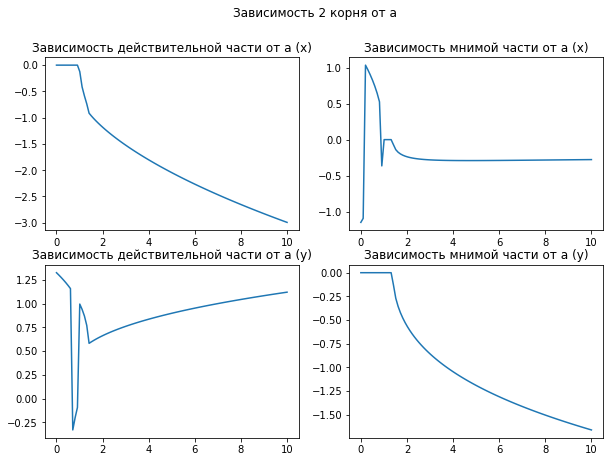

Все решения: 


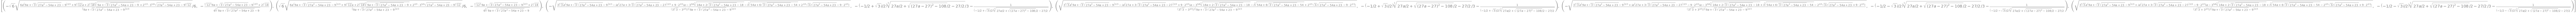

In [47]:
from sympy.abc import x, y, a
from sympy import solve, pretty_print, init_printing, lambdify
import numpy as np
import matplotlib.pyplot as plt
init_printing()


def draw(s, aa, n):
    x, y = s[n][0], s[n][1]
    fig = plt.figure(figsize=(10, 7))
    fig.suptitle(f'Зависимость {n} корня от а')
    ax1, ax2 = fig.add_subplot(2, 2, 1), fig.add_subplot(2, 2, 2)
    ax3, ax4 = fig.add_subplot(2, 2, 3), fig.add_subplot(2, 2, 4)
    ax1.set_title('Зависимость действительной части от а (x)')
    ax2.set_title('Зависимость мнимой части от а (x)')
    ax3.set_title('Зависимость действительной части от а (y)')
    ax4.set_title('Зависимость мнимой части от а (y)')
    xs = lambdify(a, x, 'numpy')(aa + 0j)
    ys = lambdify(a, y, 'numpy')(aa + 0j)
    ax1.plot(aa, xs.real), ax2.plot(aa, xs.imag)
    ax3.plot(aa, ys.real), ax4.plot(aa, ys.imag)
    plt.show()


aa = np.linspace(0, 10, 100)
eqs = [x**2 + y**3 - 1, x**2 + y - a]
s = solve(eqs, (x, y)) # 6 пар решений
print('Всего решений:', len(s))
n = 2 # Номер корня
draw(s, aa, n)
print('Все решения: ')
s

### Задание 2

In [45]:
import covid
import pandas as pd


covid_world = covid.Covid(source='worldometers').get_data()
df = pd.DataFrame(covid_world)
target_countries = 'Russia', 'Ukraine', 'Kazakhstan', 'Latvia', 'Lithuania'
df = df[df.country.isin(target_countries)]
df.recovered = list(map(int, df.recovered / (df.population / 10**6)))
df = df[['country', 'total_cases_per_million', 'recovered', 'total_deaths_per_million']].sort_values(by='total_cases_per_million', ascending=False)
df

,country,total_cases_per_million,recovered,total_deaths_per_million
73,Lithuania,188375,175402,2670
94,Latvia,143956,136116,2395
24,Ukraine,83234,76860,2148
12,Russia,69952,61529,2035
50,Kazakhstan,51449,49869,676


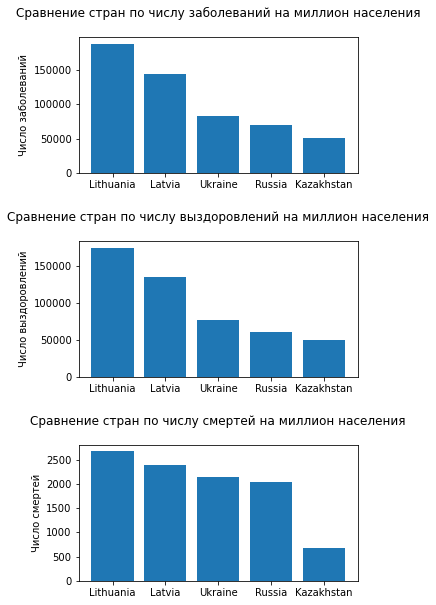

In [46]:
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(5, 10))
ax1, ax2, ax3 = fig.add_subplot(311), fig.add_subplot(312), fig.add_subplot(313)
ax1.set_title('Сравнение стран по числу заболеваний на миллион населения', pad=20)
ax1.set_ylabel('Число заболеваний')
ax1.bar(df.country, df.total_cases_per_million)
ax2.set_title('Сравнение стран по числу выздоровлений на миллион населения', pad=20)
ax2.set_ylabel('Число выздоровлений')
ax2.bar(df.country, df.recovered)
ax3.set_title('Сравнение стран по числу смертей на миллион населения', pad=20)
ax3.set_ylabel('Число смертей')
ax3.bar(df.country, df.total_deaths_per_million)
plt.subplots_adjust(hspace=0.5)
plt.show()